# Спецификация к Лабораторной работе №10 

# Процедуры и параметры. 

# Поиск экстремума с двумя условиями.

# (Вариант 22)

## Абстракция А0
### 1. Постановка задачи.
#### Задание: 
Написать программу обработки одномерного массива в соответствии с условием, 

выделив подзадачи проверки условий и поиска экстремума и оформив их в виде процедур.

#### Условие: 
Для заданного целочисленного массива $\{A_1, A_2, …, A_n\}$ определить 

номер первого максимального значения среди элементов, 

- меньших A1 и 

- расположенных правее последнего элемента, кратного девяти. 

### 2. Уточненная постановка задачи.
Дан одномерный целочисленный массив A из n элементов.

Обозначим индекс $k: (A_k \in A) \land (A_k \vdots 9) \land \neg (A_i \vdots 9), \forall i > k$. 

Найти $\displaystyle{j: A_j = \max_i \{A_i: A_i < A_1, \forall i > k\} }$.

### 3. Пример с иллюстрацией.

In [1]:
import numpy
import pylab 
%matplotlib inline
pylab.style.use('seaborn-whitegrid')

In [8]:
A1 = numpy.random.randint(-100, 100, size=50)
numpy.savetxt('A_Lab10_1.txt', A1, fmt='%5.0f')
A2 = numpy.random.randint(1, 3, size=10)
numpy.savetxt('A_Lab10_2.txt', A2, fmt='%5.0f')
A3 = numpy.random.randint(5, 10, size=50)
numpy.savetxt('A_Lab10_3.txt', A3, fmt='%5.0f')
A4 = numpy.random.randint(-10, 10, size=20)
numpy.savetxt('A_Lab10_4.txt', A4, fmt='%5.0f')
A5 = numpy.random.randint(-10, 0, size=20)
numpy.savetxt('A_Lab10_5.txt', A5, fmt='%5.0f')

print('\n', A1, '\n\n', A2, '\n\n', A3, '\n\n', A4, '\n\n', A5)


 [  72  -22   65   96   96  -38   72  -94  -57   -7   39  -20   45  -69
   97  -70   18   39   36  -80   56  -96    7  -61   68   54   -1  -13
 -100   11  -79  -45  -71    4  -60   -9  -41  -68  -73  -78  -39   55
   72   20  -68  -58  -86  -24  -27   77] 

 [1 2 2 1 2 1 2 2 2 2] 

 [5 5 6 6 8 6 7 7 6 7 7 5 8 7 8 5 9 8 9 7 9 6 5 7 7 7 8 8 9 9 7 6 7 9 5 6 6
 8 6 8 5 8 5 9 8 5 7 8 7 7] 

 [-8  9  9  9  5  4 -7  7 -1 -5 -2 -7  6 -5 -7 -1  5  4  9 -3] 

 [ -8  -3  -2  -2  -7 -10  -1  -9  -6  -9  -8  -7  -8  -1  -1  -4  -7  -4
  -4  -6]


In [21]:
# python only
print(20*' ' + 'Лаб.10\n' + 110*'=')

fin = str(input('Текстовый файл с элементами массива A: '))
fout = str(input('Текстовый файл с элементами массива A и индексом максимального значения: '))

with open(fin, 'r') as f:
    A = [int(x) for x in f.readlines()]
    
print(110*'=' + '\n' + 'Массив A: \n')
print(A)

def conditions(A):
    k = 0
    for i in range(len(A)):
        if A[i] % 9 == 0: 
            k = i + 1
    ci = []       
    for i in range(k, len(A)):
        if (A[i] < A[0]): 
            ci.append(i)    
    return ci, k

ci, k = conditions(A)

def max_condition(A, ci):
    j, MAX = 0, -1000000
    for i in range(len(A)):
        if i in ci:
            if (A[i] > MAX):
                MAX, j = A[i], i + 1
    return j

j = max_condition(A, ci)

if j == 0:
    print(110*'=' + '\n' + 'Нет таких элементов')
else:
    print(110*'=' + '\n' + 'Индекс максимального значения выбранных элементов массива A:', j)

with open(fout, 'w') as f:
    for i in range(len(A)):
        f.write("{}\n".format(A[i]))
    f.write("{}".format(j))

                    Лаб.10
Текстовый файл с элементами массива A: A_Lab10_1.txt
Текстовый файл с элементами массива A и индексом максимального значения: Aj_Lab10_1.txt
Массив A: 

[72, -22, 65, 96, 96, -38, 72, -94, -57, -7, 39, -20, 45, -69, 97, -70, 18, 39, 36, -80, 56, -96, 7, -61, 68, 54, -1, -13, -100, 11, -79, -45, -71, 4, -60, -9, -41, -68, -73, -78, -39, 55, 72, 20, -68, -58, -86, -24, -27, 77]
Нет таких элементов


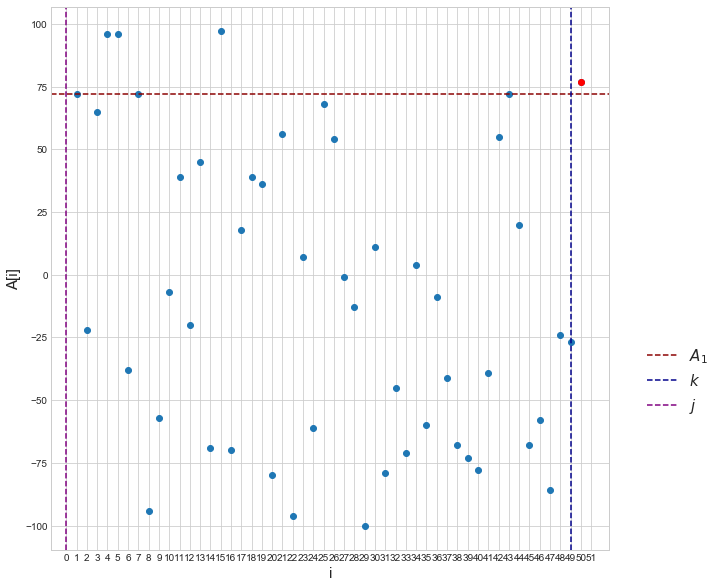

In [23]:
pylab.figure(figsize=(10,10))
pylab.scatter(range(len(A)), A)
pylab.scatter(range(k, len(A)), A[k:], c='r')
#pylab.scatter(j-1, A[j-1], s=150, label=r'$A[j]$',
#              facecolors='none', edgecolors='purple')
pylab.axhline(A[0], c='darkred', ls='--', label=r'$A_1$')
pylab.axvline(k-1, c='darkblue', ls='--', label=r'$k$')
pylab.axvline(j-1, c='purple', ls='--', label=r'$j$')

pylab.xlabel('i', fontsize=15) 
pylab.ylabel('A[i]', fontsize=15)
pylab.xticks(range(-1, len(A)+1), range(len(A)+2));
pylab.legend(fontsize=15, shadow=True, bbox_to_anchor=(1.2,0.4));

### 4. Таблица данных 

| Класс | Имя | Описание (смысл, диапазон, точность) | Тип | Структура | Формат в/в |
| :-: | :-: | :-: | :-: | :-: | :-: |
| входные данные | fin | название текстового файла с элементами массива А | символ | строка | "+X.txt" |
| входные данные | fout | название текстового файла с элементами массива А | символ | строка | "+X.txt" |
| входные данные | A | вводимые из текстового файла числа | цел | одномерный массив | +XX (:5) |
| выходные данные | j | выводимый в текстовый файл индекс максимального значения среди выбранных элементов | цел | простая переменная | XX (:2) |
| промежуточные данные | k | индекс последнего кратного 9 элемента из $A$ | цел | простая переменная | --- |
| промежуточные данные | ci | индексы элементов, удовлетворяющих условиям | цел | одномерный массив | --- |
| промежуточные данные | f | значение первого элемента массива | цел | простая переменная | --- |
| промежуточные данные | MAX | максимальное значение среди выбранных элементов | цел | простая переменная | --- |

_! в Delphi выход из цикла с 1 до 20 с шагом +1 происходит при значении 21, из цикла с 20 до 1 – при 0_